In [7]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling

In [8]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

# Cairo tiles [3<sup>2</sup>.4.3.4]
The one true tiling. Provides 4 directionally distinguishable elements... and also can be read two different ways (intersecting hexagons runninng in two orthogonal directions).

<AxesSubplot:>

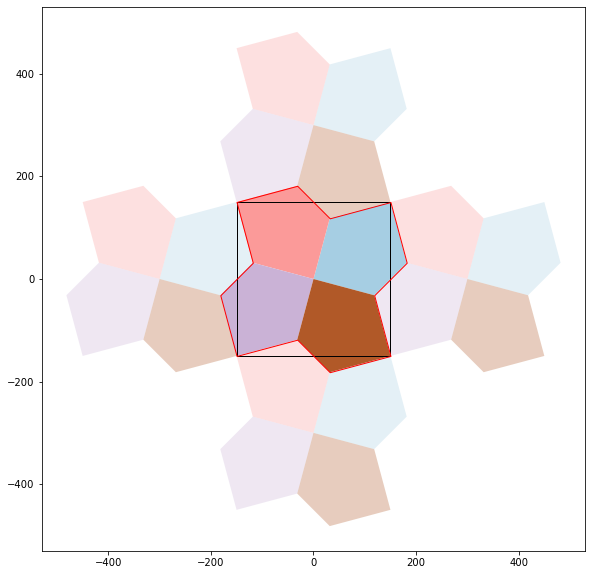

In [9]:
tile_unit = TileUnit(tiling_type = "cairo", spacing = 300, crs = ak.crs)
# tile_unit = TileUnit(tiling_type = "hex-dissection",  # cut_rotation = 15,
#                      spacing = 500, n = 3, crs = ak.crs)
tile_unit.regularise_elements()

ax = tile_unit.get_local_patch(r = 1).plot(column = "element_id", alpha = 0.3,
                                           figsize = (10, 10), cmap = "Paired")
tile_unit.elements.plot(ax = ax, column = "element_id", cmap = "Paired")
tile_unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")
tile_unit.regularised_tile.plot(ax = ax, edgecolor = "r", 
                                facecolor = "#00000000")

In [10]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")

In [15]:
t30 = tiling.get_tiled_map(rotation = 45, prioritise_tiles = True)

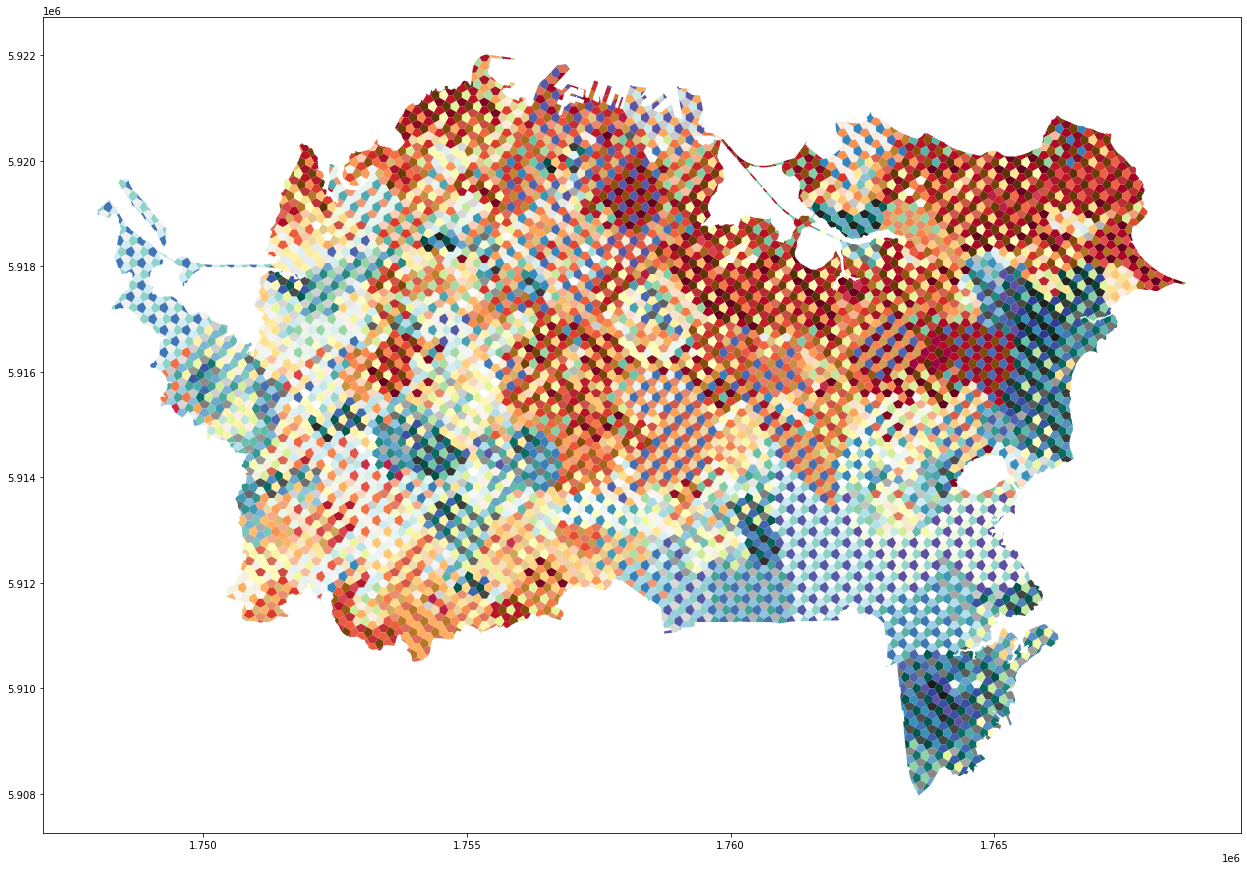

In [16]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(t30.element_id)
cols = [x for x in t30.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr", "viridis")
# cmaps = ["Greys"] * 8

for strand, col, cmap in zip(strands, cols, cmaps):
    t30[t30.element_id == strand].plot(ax = ax, column = col, cmap = cmap)